In [2]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
df = pd.read_csv("BTC.csv", usecols=['close_timestamp', 'open', 'high', 'low', 'close', 'volume'])
df.head()

,open,high,low,close,volume,close_timestamp
0,5859156.0,5859156.0,5850483.3,5850483.3,0.000994,2025-06-01 00:01:00
1,5851174.9,5854984.6,5844224.2,5844224.2,0.000271,2025-06-01 00:02:00
2,5845126.1,5854026.8,5844070.1,5854026.8,0.008777,2025-06-01 00:03:00
3,5844561.4,5851933.6,5844561.4,5851933.6,0.000071,2025-06-01 00:04:00
4,5844892.3,5844892.3,5844892.3,5844892.3,0.000145,2025-06-01 00:05:00


In [13]:
df.tail()

,open,high,low,close,volume,close_timestamp
19474,5916245.7,5925203.4,5916245.7,5921669.2,0.000463,2025-06-14 10:00:00
19475,5920381.7,5925203.4,5920381.7,5925203.4,0.005128,2025-06-14 10:01:00
19476,5925203.4,5925203.4,5915708.4,5915708.4,0.051627,2025-06-14 10:02:00
19477,5922149.5,5922149.5,5922149.5,5922149.5,0.000180,2025-06-14 10:03:00
19478,5921046.3,5921046.3,5918026.8,5918026.8,0.000320,2025-06-14 10:04:00


In [14]:
features = ['open', 'high', 'low', 'volume']
target = 'close'

train = df.iloc[:-60]
test = df.iloc[-60:]

X_train, y_train = train.drop(columns=['close_timestamp','close']), train['close']
X_test, y_test = test.drop(columns=['close_timestamp','close']), test['close']

y_train = y_train / 1e6
y_test = y_test / 1e6

In [15]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 19419, number of used features: 4
[LightGBM] [Info] Start training from score 5.920558


LGBMRegressor()

In [16]:
predictions = model.predict(X_test)

In [17]:
y_test = y_test * 1e6
y_pred_original = predictions * 1e6

In [18]:
mae = mean_absolute_error(y_test, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 2338.156683818391
RMSE: 3105.6415285719286


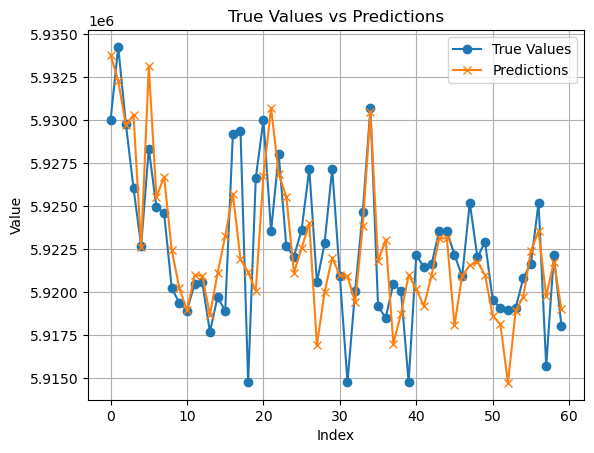

In [19]:
indices = range(len(y_test))  # x-axis: 0, 1, 2, ...

plt.plot(indices, y_test, label='True Values', marker='o')
plt.plot(indices, y_pred_original, label='Predictions', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('True Values vs Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
joblib.dump(model, "btc_model.pkl")


['btc_model.pkl']